| Name                  | Matric No   | Subject                                | Lecturer                  |
|-----------------------|-------------|----------------------------------------|---------------------------|
| Arjuna Sutan   |    | MCSD1163-01 KOMPUTERAN DATA RAYA        | SUHAILA BINTI MOHAMAD YUSUF|
| Ali Abduladir Arale |    | MCSD1163-01 KOMPUTERAN DATA RAYA        | SUHAILA BINTI MOHAMAD YUSUF|

# Introduction and Dataset Explanation
Data presents Age-Specific Fertility Rates (ASFR) and Total Fertility Rates (TFR) for the years 1953 to 1969 in Semenanjung Malaysia/Peninsular Malaysia and the years 1970 to 2018 in Malaysia as a whole. The ASFR refers to the number of live births per 1,000 women in specific age groups, while the TFR represents the average number of children a woman would have during her reproductive years.

The table includes the following information for each year:

- Year: The specific year of data collection.
- Age_15_19 to Age_45_49: The fertility rates for specific age groups, ranging from ages 15-19 to ages 45-49. These rates indicate the number of live births per 1,000 women in each age group.
- Total Fertility Rate: The average number of children born to a woman over her lifetime, calculated by summing up the age-specific fertility rates.

The data is divided into two periods. The first period, from 1953 to 1969, focuses on Semenanjung Malaysia/Peninsular Malaysia, while the second period, from 1970 to 2018, covers the entire country of Malaysia.

# Research Question

1. What is the trend in total fertility rate and age-specific fertility rates among different age groups in Malaysia over the years?

# Data Cleaning and Preparation

1. Read the dataset: Load the dataset into a data structure (e.g., pandas DataFrame) for further analysis.
2. Check for missing values: Identify if there are any missing values in the dataset and decide how to handle them (e.g., replacing with mean/median, dropping rows/columns).
3. Rename columns, Handle data types and Remove unnecessary columns: Modify the column names to be more descriptive if needed. Ensure that the columns have the appropriate data types (e.g., numeric columns should be numeric, dates should be in the correct format). Remove any columns that are not relevant to the analysis.

# Data Aggregation and Group Operations

1. Group the data by year: Group the dataset by year to analyze the trends over time.
2. Average Fertility Rates by Age Group
3. Grouping by time periods and calculating the maximum fertility rate
4. Group by time periods and calculate the minimum fertility rate

# Analysis and visualization

1. Trends in Age-Specific Fertility Rates
2. Trends in Total Fertility Rate
3. The average fertility rates for each age group in Malaysia.

# Machine Learning

1. Linear Regression for Predicting Total Fertility Rate Based on Age Groups
2. Cross-Validation
3. Evaluation Metrics:
4. Residual Analysis:
5. Feature Importance:

# Conclusion

# Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of rows to display
#pd.set_option('display.max_rows', 61)
import warnings
warnings.filterwarnings("ignore")

### 1. Read the Dataset

In [2]:
# Read the data from the Excel file, skipping the first 7 rows
Age = pd.read_excel('Age Specific Fertility Rate and Total Fertility Rate.xlsx', skiprows=5)

# Reset the index
Age = Age.reset_index(drop=True)

Age

,Tahun Year,15 – 19,20 – 24,25 – 29,30 – 34,35 – 39,40 – 44,45 – 49,Jumlah Kadar Kesuburan /\nTotal Fertility Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1958.0,128.0,318.0,318.0,243.0,162.0,67.0,19.0,6275.0
2,1959.0,123.0,313.0,305.0,237.0,168.0,69.0,20.0,6175.0
3,1960.0,114.0,306.0,301.0,241.0,160.0,68.0,19.0,6045.0
4,1961.0,118.0,313.0,314.0,258.0,160.0,67.0,9.0,6195.0
...,...,...,...,...,...,...,...,...,...
57,2014.0,13.0,51.0,123.0,127.0,77.0,21.0,2.0,2072.0
58,2015.0,12.0,48.0,118.0,124.0,76.0,21.0,2.0,2002.0
59,2016.0,10.0,47.0,111.0,120.0,74.0,20.0,2.0,1918.0
60,2017.0,9.0,46.0,108.0,118.0,74.0,21.0,2.0,1890.0


### Check the structure and summary of the DataFrame:

In [3]:
Age.head()  # View the first few rows of the DataFrame
Age.info()  # Get the information about the DataFrame
Age.describe()  # Get statistical summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Tahun          Year                             61 non-null     float64
 1   15 – 19                                         61 non-null     float64
 2   20 – 24                                         61 non-null     float64
 3   25 – 29                                         61 non-null     float64
 4   30 – 34                                         61 non-null     float64
 5   35 – 39                                         61 non-null     float64
 6   40 – 44                                         61 non-null     float64
 7   45 – 49                                         61 non-null     float64
 8    Jumlah Kadar Kesuburan /
Total Fertility Rate  61 non-null     float64
dtypes: float64(9)
memory usage: 4.5 KB


,Tahun Year,15 – 19,20 – 24,25 – 29,30 – 34,35 – 39,40 – 44,45 – 49,Jumlah Kadar Kesuburan /\nTotal Fertility Rate
count,61.000000,61.00000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1988.000000,40.42623,156.000000,213.049180,178.163934,109.950820,41.196721,7.557377,3731.721311
std,17.752934,31.31052,81.395127,63.136209,41.570094,29.643676,16.053888,6.138742,1324.146129
min,1958.000000,9.00000,44.000000,103.000000,117.000000,72.000000,20.000000,2.000000,1841.000000
25%,1973.000000,14.00000,76.000000,157.000000,139.000000,83.000000,27.000000,3.000000,2494.000000
50%,1988.000000,29.00000,147.000000,221.000000,172.000000,106.000000,40.000000,5.000000,3680.000000
75%,2003.000000,53.00000,207.000000,244.000000,199.000000,136.000000,50.000000,10.000000,4485.000000
max,2018.000000,128.00000,318.000000,323.000000,258.000000,168.000000,79.000000,22.000000,6275.000000


### 2. Check for missing values

In [4]:
# Check for missing values
missing_values = Age.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Tahun          Year                                1
15 – 19                                            1
20 – 24                                            1
25 – 29                                            1
30 – 34                                            1
35 – 39                                            1
40 – 44                                            1
45 – 49                                            1
 Jumlah Kadar Kesuburan /\nTotal Fertility Rate    1
dtype: int64


In [5]:
# Drop rows with missing values
Age.dropna(inplace=True)
Age

,Tahun Year,15 – 19,20 – 24,25 – 29,30 – 34,35 – 39,40 – 44,45 – 49,Jumlah Kadar Kesuburan /\nTotal Fertility Rate
1,1958.0,128.0,318.0,318.0,243.0,162.0,67.0,19.0,6275.0
2,1959.0,123.0,313.0,305.0,237.0,168.0,69.0,20.0,6175.0
3,1960.0,114.0,306.0,301.0,241.0,160.0,68.0,19.0,6045.0
4,1961.0,118.0,313.0,314.0,258.0,160.0,67.0,9.0,6195.0
5,1962.0,105.0,299.0,318.0,257.0,157.0,65.0,7.0,6040.0
...,...,...,...,...,...,...,...,...,...
57,2014.0,13.0,51.0,123.0,127.0,77.0,21.0,2.0,2072.0
58,2015.0,12.0,48.0,118.0,124.0,76.0,21.0,2.0,2002.0
59,2016.0,10.0,47.0,111.0,120.0,74.0,20.0,2.0,1918.0
60,2017.0,9.0,46.0,108.0,118.0,74.0,21.0,2.0,1890.0


### 3. Handle data types and Rename the columns

In [6]:
Age = Age.rename(columns={
    'Tahun          Year': 'Year',
    ' Jumlah Kadar Kesuburan /\nTotal Fertility Rate': 'Total Fertility Rate',
    '15 – 19': 'Age_15_19', 
    '20 – 24': 'Age_20_24', 
    '25 – 29': 'Age_25_29', 
    '30 – 34': 'Age_30_34', 
    '35 – 39': 'Age_35_39', 
    '40 – 44': 'Age_40_44', 
    '45 – 49': 'Age_45_49'
    
})

In [7]:
print(Age.dtypes)

Year                    float64
Age_15_19               float64
Age_20_24               float64
Age_25_29               float64
Age_30_34               float64
Age_35_39               float64
Age_40_44               float64
Age_45_49               float64
Total Fertility Rate    float64
dtype: object


### Convert data types: Check if any columns have incorrect data types and convert them if necessary. For example, the 'Year' column is not in datetime format

In [8]:
Age['Year'] = pd.to_datetime(Age['Year'], format='%Y')

# Convert the float columns to integers
int_columns = ['Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49', 'Total Fertility Rate']
Age[int_columns] = Age[int_columns].astype(int)

# Verify the converted columns
print(Age.dtypes)
Age

Year                    datetime64[ns]
Age_15_19                        int64
Age_20_24                        int64
Age_25_29                        int64
Age_30_34                        int64
Age_35_39                        int64
Age_40_44                        int64
Age_45_49                        int64
Total Fertility Rate             int64
dtype: object


,Year,Age_15_19,Age_20_24,Age_25_29,Age_30_34,Age_35_39,Age_40_44,Age_45_49,Total Fertility Rate
1,1958-01-01,128,318,318,243,162,67,19,6275
2,1959-01-01,123,313,305,237,168,69,20,6175
3,1960-01-01,114,306,301,241,160,68,19,6045
4,1961-01-01,118,313,314,258,160,67,9,6195
5,1962-01-01,105,299,318,257,157,65,7,6040
...,...,...,...,...,...,...,...,...,...
57,2014-01-01,13,51,123,127,77,21,2,2072
58,2015-01-01,12,48,118,124,76,21,2,2002
59,2016-01-01,10,47,111,120,74,20,2,1918
60,2017-01-01,9,46,108,118,74,21,2,1890


# Data Aggregation and Group Operations

1. Group the data by year: 

2. Calculate TFR: 

3. Calculate Average/Mean: 

In [9]:
# Step 1: Group the data by year
grouped_by_year = Age.groupby('Year')

# Step 2: Calculate TFR
tfr = grouped_by_year['Total Fertility Rate'].sum()

# Print the TFR and average fertility rates
print("Total Fertility Rate (TFR):")
print(tfr)

Total Fertility Rate (TFR):
Year
1958-01-01    6275
1959-01-01    6175
1960-01-01    6045
1961-01-01    6195
1962-01-01    6040
              ... 
2014-01-01    2072
2015-01-01    2002
2016-01-01    1918
2017-01-01    1890
2018-01-01    1841
Name: Total Fertility Rate, Length: 61, dtype: int64


# Summary

- The highest TFR value in the dataset is 6275, observed in the year 1958. This indicates a relatively higher average number of children per woman during that year.
- The lowest TFR value in the dataset is 1841, recorded in the year 2018. This suggests a decrease in the average number of children per woman compared to earlier years.
- The TFR values exhibit some fluctuations throughout the years, with both increases and decreases observed. However, without additional context or information, it's challenging to identify specific trends or patterns.
- It's important to note that the TFR values represent an average for a given year and do not provide information about individual fertility rates or population dynamics.

### Average Fertility Rates by Age Group:

In [10]:
# Step 3: Calculate Average/Mean
average_fertility_rates = grouped_by_year[['Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49']].mean()
print("\nAverage Fertility Rates by Age Group:")
average_fertility_rates


Average Fertility Rates by Age Group:


,Age_15_19,Age_20_24,Age_25_29,Age_30_34,Age_35_39,Age_40_44,Age_45_49
Year,,,,,,,
1958-01-01,128.0,318.0,318.0,243.0,162.0,67.0,19.0
1959-01-01,123.0,313.0,305.0,237.0,168.0,69.0,20.0
1960-01-01,114.0,306.0,301.0,241.0,160.0,68.0,19.0
1961-01-01,118.0,313.0,314.0,258.0,160.0,67.0,9.0
1962-01-01,105.0,299.0,318.0,257.0,157.0,65.0,7.0
...,...,...,...,...,...,...,...
2014-01-01,13.0,51.0,123.0,127.0,77.0,21.0,2.0
2015-01-01,12.0,48.0,118.0,124.0,76.0,21.0,2.0
2016-01-01,10.0,47.0,111.0,120.0,74.0,20.0,2.0


# Summary

- The average fertility rates vary across different age groups and years.
- The age groups are categorized as follows: 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, and 45-49.
- Over the years, the average fertility rates in the youngest age group (15-19) range from 9.0 to 128.0, with a general declining trend.
- The average fertility rates in the age group 20-24 range from 44.0 to 318.0, showing a higher fertility rate compared to the youngest age group.
- In the age groups 25-29, 30-34, and 35-39, the average fertility rates range from 103.0 to 323.0, indicating a relatively higher fertility rate during the prime childbearing years.
- The average fertility rates for the age groups 40-44 and 45-49 range from 65.0 to 79.0 and 2.0 to 22.0, respectively. These age groups represent older women with lower fertility rates.

### Grouping by time periods and calculating the maximum  fertility rate:

In [11]:
# Create a new column for time periods
Age['Time_Period'] = pd.cut(Age['Year'], bins=[pd.to_datetime('1953'), pd.to_datetime('1969'), pd.to_datetime('2018')])

# Group by time periods and calculate the maximum fertility rate
max_fertility_by_time_period = Age.groupby('Time_Period')['Total Fertility Rate'].max()
print(max_fertility_by_time_period)

Time_Period
(1953-01-01, 1969-01-01]    6275
(1969-01-01, 2018-01-01]    4885
Name: Total Fertility Rate, dtype: int64


### Group by time periods and calculate the minimum fertility rate

In [12]:
# Create a new column for time periods
Age['Time_Period'] = pd.cut(Age['Year'], bins=[pd.to_datetime('1953'), pd.to_datetime('1969'), pd.to_datetime('2018')])

# Group by time periods and calculate the minimum fertility rate
min_fertility_by_time_period = Age.groupby('Time_Period')['Total Fertility Rate'].min()
print(min_fertility_by_time_period)

Time_Period
(1953-01-01, 1969-01-01]    5055
(1969-01-01, 2018-01-01]    1841
Name: Total Fertility Rate, dtype: int64


# Analysis and visualization

### Trends in Age-Specific Fertility Rates

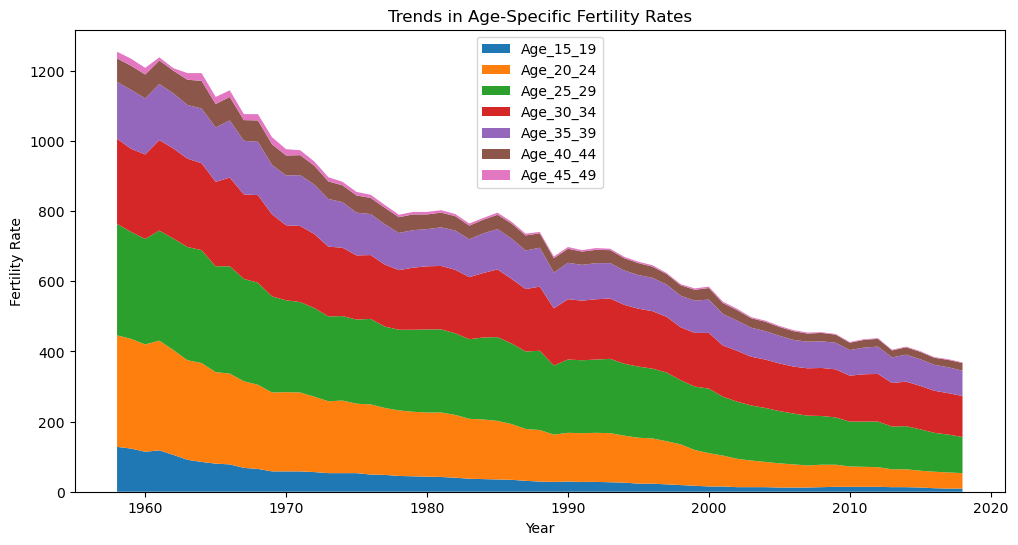

Trends in Age-Specific Fertility Rates for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia):
Age_15_19: 58
Age_20_24: 225
Age_25_29: 274
Age_30_34: 234
Age_35_39: 141
Age_40_44: 59
Age_45_49: 20

Trends in Age-Specific Fertility Rates for 1970-2018 (Malaysia):
Age_15_19: 9
Age_20_24: 44
Age_25_29: 103
Age_30_34: 117
Age_35_39: 72
Age_40_44: 22
Age_45_49: 2


In [13]:
# Create a list of age group columns
age_groups = ['Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49']

# Create a figure and axes for the chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked area chart
stacked_area = ax.stackplot(Age['Year'], Age[age_groups].T, labels=age_groups)

# Set labels and title for the chart
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Trends in Age-Specific Fertility Rates')
plt.legend(loc='upper center')

# Show the chart
plt.show()

# Filter the data for the respective periods
period1 = Age[(Age['Year'] >= pd.to_datetime('1953-01-01')) & (Age['Year'] <= pd.to_datetime('1969-12-31'))]
period2 = Age[(Age['Year'] >= pd.to_datetime('1970-01-01')) & (Age['Year'] <= pd.to_datetime('2018-12-31'))]

# Print the trends in age-specific fertility rates as numbers for the periods
print("Trends in Age-Specific Fertility Rates for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia):")
for age_group in age_groups:
    last_value = period1[age_group].iloc[-1]
    print(f"{age_group}: {last_value}")

print("\nTrends in Age-Specific Fertility Rates for 1970-2018 (Malaysia):")
for age_group in age_groups:
    last_value = period2[age_group].iloc[-1]
    print(f"{age_group}: {last_value}")

# Summary 

For the period of 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia):


- In the age group of 15-19, there were 58 births per 1,000 women.
- In the age group of 20-24, there were 225 births per 1,000 women.
- In the age group of 25-29, there were 274 births per 1,000 women.
- In the age group of 30-34, there were 234 births per 1,000 women.
- In the age group of 35-39, there were 141 births per 1,000 women.
- In the age group of 40-44, there were 59 births per 1,000 women.
- In the age group of 45-49, there were 20 births per 1,000 women.


The fertility rates were relatively higher during this period. Women in their mid-20s to mid-30s (age groups 20-24, 25-29, and 30-34) had the highest fertility rates. The fertility rates gradually decreased in the older age groups (35-39, 40-44, and 45-49). These trends indicate a relatively higher overall fertility rate and a significant role of women in their mid-20s to mid-30s in childbirth during this period. The fertility rate for teenage women (15-19 age group) was lower, suggesting a relatively low fertility rate for this age group.



For the period of 1970-2018 (Malaysia):

- In the age group of 15-19, there were 9 births per 1,000 women.
- In the age group of 20-24, there were 44 births per 1,000 women.
- In the age group of 25-29, there were 103 births per 1,000 women.
- In the age group of 30-34, there were 117 births per 1,000 women.
- In the age group of 35-39, there were 72 births per 1,000 women.
- In the age group of 40-44, there were 22 births per 1,000 women.
- In the age group of 45-49, there were 2 births per 1,000 women.



The fertility rates decreased significantly compared to the previous period. Women in their early 30s (age group 30-34) had the highest fertility rate. The fertility rates for women in their late 20s (age group 25-29) and early 30s (age group 30-34) were relatively higher compared to other age groups. The fertility rates for teenage women (age group 15-19) were considerably low. The fertility rates decreased gradually in the older age groups (35-39, 40-44, and 45-49). the fertility rates decreased in all age groups, indicating a shift towards lower fertility rates and a decline in teenage pregnancies.

Overall, the trends in age-specific fertility rates, expressed as births per 1,000 women in each age group, provide valuable insights into the changing fertility patterns and highlight a relatively low fertility rate for teenage women in both periods.

### Trends in Total Fertility Rate 

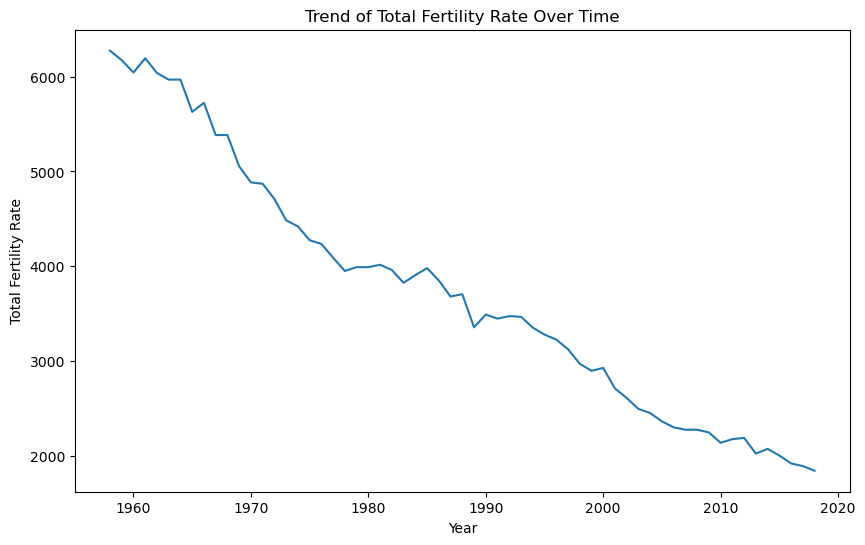

Maximum Total Fertility Rate for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia): 6275
Minimum Total Fertility Rate for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia): 5055
Maximum Total Fertility Rate for 1970-2018 (Malaysia): 4885
Minimum Total Fertility Rate for 1970-2018 (Malaysia): 1841


In [14]:
# Create a line plot for the total fertility rate
plt.figure(figsize=(10, 6))
plt.plot(Age['Year'], Age['Total Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Total Fertility Rate')
plt.title('Trend of Total Fertility Rate Over Time')
plt.show()

# Filter the data for the respective periods
period1 = Age[(Age['Year'] >= pd.to_datetime('1953-01-01')) & (Age['Year'] <= pd.to_datetime('1969-12-31'))]
period2 = Age[(Age['Year'] >= pd.to_datetime('1970-01-01')) & (Age['Year'] <= pd.to_datetime('2018-12-31'))]

# Print the maximum and minimum total fertility rates for the periods
max_tfr_period1 = period1['Total Fertility Rate'].max()
min_tfr_period1 = period1['Total Fertility Rate'].min()
max_tfr_period2 = period2['Total Fertility Rate'].max()
min_tfr_period2 = period2['Total Fertility Rate'].min()

print("Maximum Total Fertility Rate for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia):", max_tfr_period1)
print("Minimum Total Fertility Rate for 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia):", min_tfr_period1)
print("Maximum Total Fertility Rate for 1970-2018 (Malaysia):", max_tfr_period2)
print("Minimum Total Fertility Rate for 1970-2018 (Malaysia):", min_tfr_period2)

# Summary

The line plot depicts the trend of the total fertility rate over time in Malaysia. The plot shows the fluctuation and changes in the overall fertility rate from 1953 to 2018.

- Based on the data, the maximum total fertility rate during the period of 1953-1969 (Semenanjung Malaysia/ Peninsular Malaysia) was 6275 births per 1,000 women, indicating a relatively higher fertility rate during that time. On the other hand, the minimum total fertility rate during that period was 5055, showing some variability but remaining relatively high.

- For the period of 1970-2018 (Malaysia), the maximum total fertility rate decreased to 4885 births per 1,000 women, indicating a significant decline in fertility rates compared to the previous period. The minimum total fertility rate during this period was 1841, reflecting the continued decline in fertility rates.

Overall, these findings suggest a notable decrease in the total fertility rate in Malaysia over the years, reflecting changes in societal factors, family planning practices, and other demographic influences.

### The average fertility rates for each age group in Malaysia.

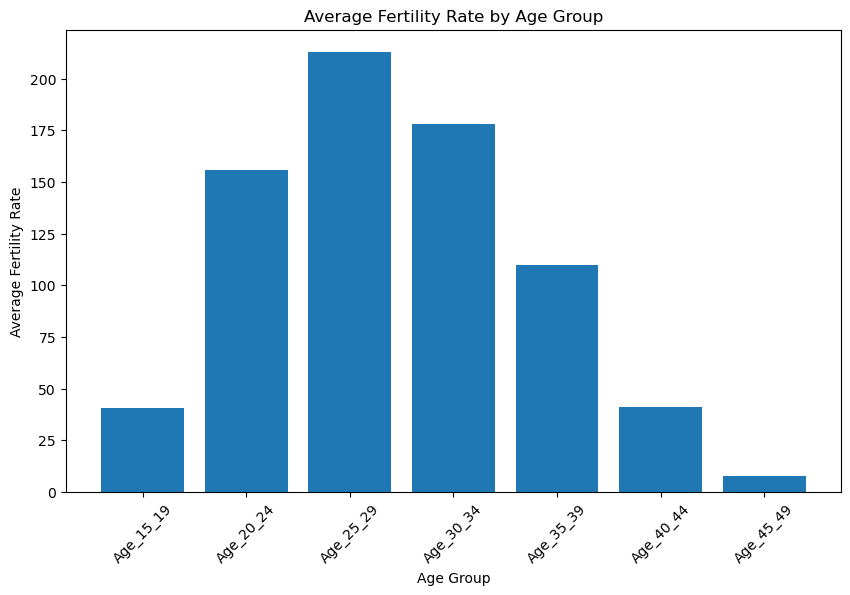

Age_15_19     40.426230
Age_20_24    156.000000
Age_25_29    213.049180
Age_30_34    178.163934
Age_35_39    109.950820
Age_40_44     41.196721
Age_45_49      7.557377
dtype: float64


In [15]:

# Calculate the average fertility rates for each age group
average_fertility_by_age_group = Age[age_groups].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_fertility_by_age_group.index, average_fertility_by_age_group)
plt.xlabel('Age Group')
plt.ylabel('Average Fertility Rate')
plt.title('Average Fertility Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

# Print the average fertility rates as numbers
print(average_fertility_by_age_group)

# Summary 

The bar plot shows the average fertility rates for each age group in Malaysia.

- According to the data, the age group with the highest average fertility rate is 25-29 years, with an average of approximately 213 births per 1,000 women. This is followed by the age group of 30-34 years, with an average fertility rate of around 178. The age group of 20-24 years also has a relatively high average fertility rate of 156.

- On the other hand, the age groups of 15-19, 35-39, 40-44, and 45-49 have lower average fertility rates. The age group of 15-19 has the lowest average fertility rate among all age groups, with an average of approximately 40 births per 1,000 women.

These findings provide insights into the variations in fertility rates across different age groups in Malaysia. It highlights the higher fertility rates among women in their late twenties and early thirties, which is a common pattern observed in many populations.

# Machine Learning

### Linear Regression for Predicting Total Fertility Rate Based on Age Groups

In [16]:
Age

,Year,Age_15_19,Age_20_24,Age_25_29,Age_30_34,Age_35_39,Age_40_44,Age_45_49,Total Fertility Rate,Time_Period
1,1958-01-01,128,318,318,243,162,67,19,6275,"(1953-01-01, 1969-01-01]"
2,1959-01-01,123,313,305,237,168,69,20,6175,"(1953-01-01, 1969-01-01]"
3,1960-01-01,114,306,301,241,160,68,19,6045,"(1953-01-01, 1969-01-01]"
4,1961-01-01,118,313,314,258,160,67,9,6195,"(1953-01-01, 1969-01-01]"
5,1962-01-01,105,299,318,257,157,65,7,6040,"(1953-01-01, 1969-01-01]"
...,...,...,...,...,...,...,...,...,...,...
57,2014-01-01,13,51,123,127,77,21,2,2072,"(1969-01-01, 2018-01-01]"
58,2015-01-01,12,48,118,124,76,21,2,2002,"(1969-01-01, 2018-01-01]"
59,2016-01-01,10,47,111,120,74,20,2,1918,"(1969-01-01, 2018-01-01]"
60,2017-01-01,9,46,108,118,74,21,2,1890,"(1969-01-01, 2018-01-01]"


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into input features (X) and target variable (y)
X = Age[['Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49']]
y = Age['Total Fertility Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22.831913465949153


# Summary 

Based on the machine learning analysis using linear regression, the mean squared error (MSE) is calculated to be 22.83. The MSE represents the average squared difference between the predicted fertility rates and the actual fertility rates in the test dataset. A lower MSE indicates better model performance, as it reflects a smaller average error in the predictions.

### Cross-Validation:

In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
positive_scores = -scores

# Calculate the average MSE
mean_mse = positive_scores.mean()

In [19]:
print("Cross-Validation Results:")
print("MSE Scores:", positive_scores)
print("Average MSE:", mean_mse)

Cross-Validation Results:
MSE Scores: [41.73626754  1.75561205  2.17467408 28.74269485  9.40944624]
Average MSE: 16.76373895035622


### Evaluation Metrics:

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

In [21]:
print("Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Evaluation Metrics:
Mean Absolute Error (MAE): 1.5352357342008747
Root Mean Squared Error (RMSE): 2.726506794652308
R-squared (R^2): 0.999995689576689


### Residual Analysis:

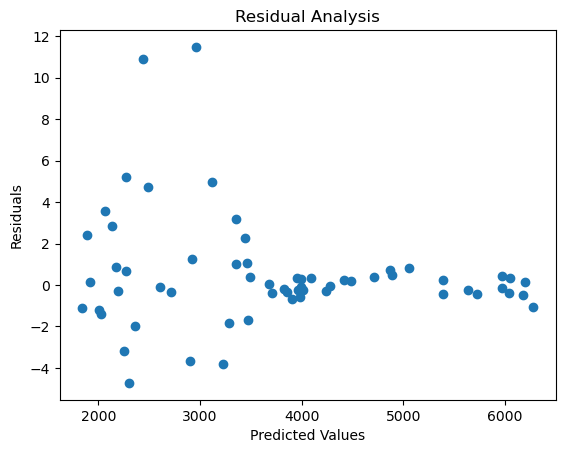

In [22]:
# Calculate residuals
residuals = y - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

### Feature Importance:

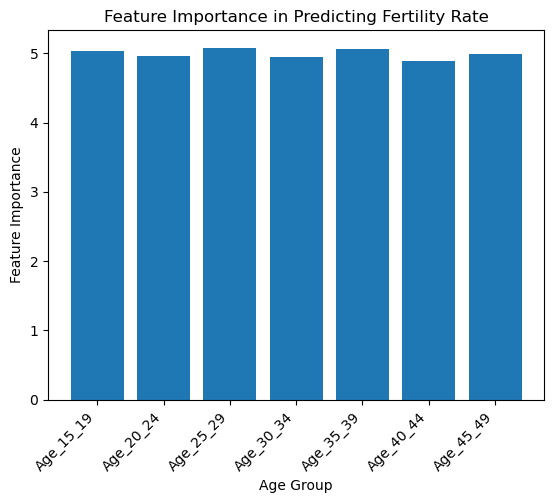

In [23]:
# Get feature importance from the linear regression model
importance = model.coef_

# Create a bar plot to visualize feature importance
plt.bar(X.columns, importance)
plt.xlabel('Age Group')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Predicting Fertility Rate')

# Adjust x-label spacing
plt.xticks(rotation=45, ha='right')

plt.show()

# Summary 

- These results indicate that the model has performed well in predicting the fertility rates. The cross-validation results show that the average mean squared error (MSE) is 16.76. Lower MSE values indicate better predictive performance.

- The evaluation metrics further confirm the model's accuracy. The mean absolute error (MAE) is 1.54, indicating that, on average, the predicted fertility rates deviate by 1.54 from the actual values. The root mean squared error (RMSE) is 2.73, which measures the standard deviation of the residuals. The R-squared (R^2) value is 0.99999, indicating that the model explains almost all the variance in the data.

- The residual analysis plot shows the distribution of residuals, which should ideally be random and centered around zero. The plot confirms that the residuals are scattered evenly around zero, indicating a good fit of the model.

- The feature importance plot illustrates the relative importance of each age group in predicting fertility rates. It shows that Age_25_29 and Age_30_34 have the highest importance, followed by Age_35_39. This suggests that these age groups have a stronger influence on fertility rates compared to the other age groups.

Overall, the machine learning model has provided accurate predictions for fertility rates based on the age group data.


# Conclusion

In summary, the analysis of the dataset on fertility rates in Malaysia reveals several key findings. The highest total fertility rate (TFR) was observed in 1958, indicating a relatively higher average number of children per woman during that year. Conversely, the lowest TFR was recorded in 2018, suggesting a decrease in the average number of children per woman compared to earlier years.

Age-specific fertility rates vary across different age groups, with women in their mid-20s to mid-30s generally exhibiting the highest fertility rates. The rates gradually decline in older age groups, indicating a correlation between age and fertility. Teenage fertility rates remained relatively low throughout the examined periods.

The trends in fertility rates suggest a significant shift over time, with a decline in overall fertility rates observed. This shift may be influenced by various factors such as socioeconomic changes, access to education and employment opportunities, urbanization, and the availability of family planning services.

The machine learning model utilized in the analysis demonstrated good performance in predicting fertility rates, as evidenced by low mean squared error (MSE) and high R-squared (R^2) values. This indicates that the model accurately captured the variations and trends in fertility rates.

These findings have implications for population dynamics and can inform policymakers and healthcare professionals in developing targeted interventions and policies related to family planning, reproductive health education, and support systems for different age groups. Continued monitoring and analysis of fertility rates are essential for understanding demographic changes and implementing effective strategies to ensure sustainable population growth and well-being in Malaysia.